## Các bước xây dựng 1 mô hình học máy:
1. Xác định các yêu cầu: Bài toán đang giải quyết những vấn đề gì, mục tiêu cần đạt được là gì ?
2. Thu thập, Xử lý và Làm sạch dữ liệu: chuyển đổi kiểu dl, xử lý dữ liệu thiếu-trùng lặp, sai định dạng...
3. Xây dựng mô hình học máy:
   - Xác định các biến tính năng(features), biến mục tiêu (target)
   - Chia tập dữ liệu thành tập train và tập test
   - Tạo mô hình học máy
   - Huấn luyện mô hình (dựa trên tập train)
   - Tạo biến dự đoán trên tập test
   - Đánh giá mô hình: accurancy, Báo cáo phân loại, ma trận nhầm lẫn...
4. Thử nghiệm mô hình với 1 tập dữ liệu bất kì

### 1. Xác định yêu cầu: 
    - Mục tiêu: xây dựng mô hình Naive Bayes: để phân loại/xác định bệnh nhân có bị tiểu đường hay không?
    - Các yếu tố: lượng đường trong máu, huyết áp

### 2. Thu thập, xử lý dữ liệu: 
    - Dataset: "./NB_Dataset.csv"
    - Original Source: "https://www.kaggle.com/datasets/himanshunakrani/naive-bayes-classification-data"
    - Dataset gồm 3 cột: "glucose", "bloodpressure","diabetes"

In [89]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Nhập dữ liệu
diabetes_data = pd.read_csv("./NB_Dataset.csv")

In [4]:
#In ra thông tin của tập dl vừa nhập
diabetes_data.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [7]:
diabetes_data.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [11]:
#EDA dữ liệu


### 3. Xây dựng mô hình học máy: 

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [13]:
# Tạo features và target
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

In [14]:
# Tạo tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
len(X_train), len(X_test)

(796, 199)

In [20]:
# Xây dựng mô hình
clf = GaussianNB()
#Huấn luyện mô hình
clf.fit(X_train, y_train)

GaussianNB()

In [64]:
# Biến dự đoán
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0])

In [67]:
#Đánh giá hiệu suất giữa y_pred và y_test
accurancy = accuracy_score(y_test,y_pred)
print(f"Accurancy score: {accurancy*100:0.3} %")

Accurancy score: 93.0 %


In [68]:
#Ma trận nhầm lẫn
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[86,  7],
       [ 7, 99]])

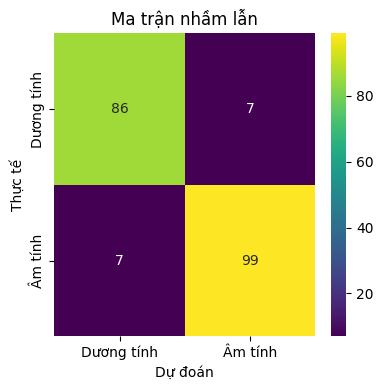

In [91]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion,xticklabels=['Dương tính','Âm tính'],yticklabels=['Dương tính','Âm tính'],annot=True,cmap='viridis',fmt='d')
plt.title("Ma trận nhầm lẫn")
plt.xlabel("Dự đoán")
plt.ylabel('Thực tế')
plt.tight_layout();

In [70]:
clf_report =classification_report(y_test, y_pred,target_names=['Dương tính','Âm tính']);
print("Báo cáo phân loại:\n",clf_report)

Báo cáo phân loại:
               precision    recall  f1-score   support

  Dương tính       0.92      0.92      0.92        93
     Âm tính       0.93      0.93      0.93       106

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199



## 4. Dự đoán dựa trên 1 dữ liệu mới

In [75]:
sample = pd.DataFrame([[40,105]], columns=['glucose','bloodpressure'])

In [76]:
y_pre = clf.predict(sample)
print(y_pre)

[0]


In [77]:
if y_pre == [0]:
    print("Âm tính")
else:
    print('Dương tính')

Âm tính
